In [37]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [3]:
train_df = pd.read_csv(Path('Resources/2019loans.csv'))
test_df = pd.read_csv(Path('Resources/2020Q1loans.csv'))

In [4]:
train_df.head(10)

,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,57107,57107,13375.0,0.1797,483.34,MORTGAGE,223000.0,Not Verified,low_risk,n,...,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,N,N
1,141451,141451,21000.0,0.1308,478.68,MORTGAGE,123000.0,Source Verified,low_risk,n,...,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,N,N
2,321143,321143,20000.0,0.1240,448.95,MORTGAGE,197000.0,Source Verified,low_risk,n,...,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,N,N
3,11778,11778,3000.0,0.1240,100.22,RENT,45000.0,Not Verified,low_risk,n,...,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,N,N
4,169382,169382,30000.0,0.1612,1056.49,MORTGAGE,133000.0,Source Verified,low_risk,n,...,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,N,N
5,31295,31295,6500.0,0.1614,228.98,MORTGAGE,65000.0,Not Verified,low_risk,n,...,92.3,50.0,1.0,0.0,64660.0,39487.0,12800.0,42060.0,N,N
6,173238,173238,40000.0,0.1240,897.89,MORTGAGE,171000.0,Not Verified,low_risk,n,...,88.9,75.0,0.0,0.0,772030.0,83509.0,41200.0,81300.0,N,N
7,116755,116755,5000.0,0.1719,178.74,MORTGAGE,55000.0,Not Verified,low_risk,n,...,90.0,0.0,0.0,0.0,17075.0,11244.0,500.0,14275.0,N,N
8,170311,170311,6000.0,0.1102,196.49,OWN,36000.0,Not Verified,low_risk,n,...,100.0,0.0,1.0,0.0,65200.0,21103.0,43300.0,12100.0,N,N
9,254794,254794,10625.0,0.1102,347.95,RENT,73000.0,Source Verified,low_risk,n,...,91.9,30.0,0.0,0.0,41869.0,11859.0,24500.0,10169.0,N,N


In [5]:
train_df["loan_status"].value_counts()

low_risk     6090
high_risk    6090
Name: loan_status, dtype: int64

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12180 entries, 0 to 12179
Data columns (total 86 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  12180 non-null  int64  
 1   index                       12180 non-null  int64  
 2   loan_amnt                   12180 non-null  float64
 3   int_rate                    12180 non-null  float64
 4   installment                 12180 non-null  float64
 5   home_ownership              12180 non-null  object 
 6   annual_inc                  12180 non-null  float64
 7   verification_status         12180 non-null  object 
 8   loan_status                 12180 non-null  object 
 9   pymnt_plan                  12180 non-null  object 
 10  dti                         12180 non-null  float64
 11  delinq_2yrs                 12180 non-null  float64
 12  inq_last_6mths              12180 non-null  float64
 13  open_acc                    121

In [7]:
# Convert categorical data to numeric and separate target feature for training data
cat_columns = train_df.select_dtypes(include= "object").columns
cat_columns

Index(['home_ownership', 'verification_status', 'loan_status', 'pymnt_plan',
       'initial_list_status', 'application_type', 'hardship_flag',
       'debt_settlement_flag'],
      dtype='object')

In [8]:
# How many total values are in the cat_columns
for column in train_df[cat_columns]:
    print(train_df[column].value_counts())
    print("-----------")

MORTGAGE    5800
RENT        4944
OWN         1371
ANY           65
Name: home_ownership, dtype: int64
-----------
Not Verified       5301
Source Verified    4881
Verified           1998
Name: verification_status, dtype: int64
-----------
low_risk     6090
high_risk    6090
Name: loan_status, dtype: int64
-----------
n    12180
Name: pymnt_plan, dtype: int64
-----------
w    11158
f     1022
Name: initial_list_status, dtype: int64
-----------
Individual    10400
Joint App      1780
Name: application_type, dtype: int64
-----------
N    11832
Y      348
Name: hardship_flag, dtype: int64
-----------
N    12175
Y        5
Name: debt_settlement_flag, dtype: int64
-----------


In [9]:
# Looking at the shape of the train_df
train_df.shape

(12180, 86)

In [10]:
# split out X_train
X_train = train_df.drop(columns=["loan_status"])
X_train.shape

(12180, 85)

In [11]:
#split out y_train
y_train = train_df["loan_status"]
y_train

0         low_risk
1         low_risk
2         low_risk
3         low_risk
4         low_risk
           ...    
12175    high_risk
12176    high_risk
12177    high_risk
12178    high_risk
12179    high_risk
Name: loan_status, Length: 12180, dtype: object

In [12]:
# Convert categorical data to numeric and separate target feature for testing data
X_train = pd.get_dummies(X_train)
X_train.shape


(12180, 94)

In [13]:
# Convert categorical data to numeric and separate target feature for testing data
X_test = test_df.drop(columns=["loan_status"])
y_test = test_df["loan_status"]

In [14]:
X_test.shape

(4702, 85)

In [15]:
# Convert categorical data to numeric and separate target feature for test data
cat_columns = test_df.select_dtypes(include= "object").columns
cat_columns

Index(['home_ownership', 'verification_status', 'loan_status', 'pymnt_plan',
       'initial_list_status', 'application_type', 'hardship_flag',
       'debt_settlement_flag'],
      dtype='object')

In [16]:
# How many total values are in the cat_columns
for column in test_df[cat_columns]:
    print(test_df[column].value_counts())
    print("-----------")

MORTGAGE    2131
RENT        2033
OWN          533
ANY            5
Name: home_ownership, dtype: int64
-----------
Not Verified       2454
Source Verified    1715
Verified            533
Name: verification_status, dtype: int64
-----------
low_risk     2351
high_risk    2351
Name: loan_status, dtype: int64
-----------
n    4702
Name: pymnt_plan, dtype: int64
-----------
w    4377
f     325
Name: initial_list_status, dtype: int64
-----------
Individual    4165
Joint App      537
Name: application_type, dtype: int64
-----------
N    4621
Y      81
Name: hardship_flag, dtype: int64
-----------
N    4702
Name: debt_settlement_flag, dtype: int64
-----------


In [17]:
#Use get dummies to convert categorical to numeric
X_test = pd.get_dummies(X_test)
X_test.shape

(4702, 93)

In [18]:
# add missing dummy variables to testing set
#find missing row
for column in X_train.columns:
    # use conditional statement to check if column is in X_test
    if column not in X_test.columns:
        # print(column)
        X_test[column]= 0


In [19]:
# Check the shape of X_test
X_test.shape

(4702, 94)

In [20]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4702 entries, 0 to 4701
Data columns (total 94 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           4702 non-null   int64  
 1   index                                4702 non-null   int64  
 2   loan_amnt                            4702 non-null   float64
 3   int_rate                             4702 non-null   float64
 4   installment                          4702 non-null   float64
 5   annual_inc                           4702 non-null   float64
 6   dti                                  4702 non-null   float64
 7   delinq_2yrs                          4702 non-null   float64
 8   inq_last_6mths                       4702 non-null   float64
 9   open_acc                             4702 non-null   float64
 10  pub_rec                              4702 non-null   float64
 11  revol_bal                     

In [21]:
# Train the Logistic Regression model on the unscaled data and print the model score
# Model
LR_model = LogisticRegression(random_state= 77)
# Fit
LR_model.fit(X_train,y_train)
# Score
LR_model.score(X_test,y_test)

C:\Users\brand\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5253083794130158

In [22]:
# Train a Random Forest Classifier model and print the model score
#Model
RFC_model = RandomForestClassifier(random_state= 77)
# Fit
RFC_model.fit(X_train,y_train)
#Score
RFC_model.score(X_test,y_test)

0.6548277328796257

In [23]:
# Scale the data
# Using Standard Scalar 
# Model
scaler = StandardScaler()
# Fit
scaler = scaler.fit(X_train)
#Transform
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [24]:
X_train_scaled[0:5,:]

array([[-1.31172014, -1.31172014, -0.39311205,  0.73658452, -0.08760946,
         0.79027929,  0.30961463, -0.32002561, -0.69540144,  0.37691739,
        -0.35198632,  0.97933871,  1.08333618, -0.07136838, -0.07121699,
        -1.09378946, -1.093659  , -0.92422387, -0.9683145 , -0.15098128,
         0.        ,  0.        ,  0.05395363, -0.13312632,  0.        ,
        -0.00906138, -0.13971415,  1.80631885,  0.78540566,  1.17957176,
         2.1409169 ,  3.13618293, -0.51642773,  0.74114448, -0.02074907,
        -0.22528046, -0.66929854,  3.4553425 ,  0.61662261,  0.50360151,
        -0.28280057,  3.50659128, -0.13229478,  1.18604519,  1.17736048,
        -0.4308203 ,  0.95191111, -0.07108199, -0.00906138,  0.60175665,
         1.90745971, -0.64875472, -0.64835039, -0.17563511, -0.66180723,
         0.13191341, -0.35942048, -1.16762498, -0.52389304, -0.98968236,
        -0.50928902,  1.0718466 , -0.33415066,  0.46534105, -0.52521034,
         0.37926859,  0.        , -0.00906138, -0.1

In [34]:
# Train the Logistic Regression model on the scaled data and print the model score

# Model
LR_model = LogisticRegression(random_state= 77,max_iter=300)
# Fit
LR_model.fit(X_train_scaled,y_train)
# Predict
predictions = LR_model.predict(X_test_scaled)
# Score
LR_model.score(X_test_scaled,y_test)


0.7205444491705657

In [35]:
predictions

array(['low_risk', 'low_risk', 'low_risk', ..., 'high_risk', 'low_risk',
       'high_risk'], dtype=object)

In [36]:
# Examine Confusion Matrix
CM = confusion_matrix(y_test,predictions)
CM

array([[1243, 1108],
       [ 206, 2145]], dtype=int64)

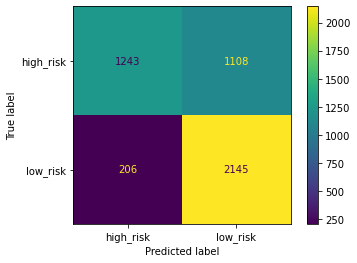

In [38]:
# Visualize Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix= CM, display_labels= LR_model.classes_)
disp.plot()

In [40]:
# Examine the classification report
# print(classification_report(y_true, y_pred, target_names=target_names))
report = classification_report(y_test,predictions)
print(report)

              precision    recall  f1-score   support

   high_risk       0.86      0.53      0.65      2351
    low_risk       0.66      0.91      0.77      2351

    accuracy                           0.72      4702
   macro avg       0.76      0.72      0.71      4702
weighted avg       0.76      0.72      0.71      4702



In [41]:
# Train a Random Forest Classifier model on the scaled data and print the model score
#Model
RFC_model = RandomForestClassifier(random_state= 77)
# Fit
RFC_model.fit(X_train_scaled,y_train)
# Predict
predictions = RFC_model.predict(X_test_scaled)
#Score
RFC_model.score(X_test_scaled,y_test)

0.6558911101658869

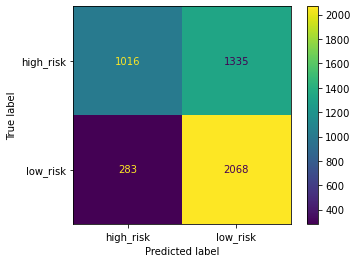

In [42]:
# Examine Confusion Matrix
CM = confusion_matrix(y_test,predictions)
CM
# Visualize Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix= CM, display_labels= RFC_model.classes_)
disp.plot()

In [43]:
report = classification_report(y_test,predictions)
print(report)

              precision    recall  f1-score   support

   high_risk       0.78      0.43      0.56      2351
    low_risk       0.61      0.88      0.72      2351

    accuracy                           0.66      4702
   macro avg       0.69      0.66      0.64      4702
weighted avg       0.69      0.66      0.64      4702



In [48]:
# Feature importances
feature_importance = RFC_model.feature_importances_
#feature_importance

columns = X_train.columns
# Create DF
feature_importance_df = pd.DataFrame({"feature":columns,"importance":feature_importance})
feature_importance_df

# Top 10 feature importance
top10_features = feature_importance_df.sort_values("importance",ascending=False)
top10_features.head(10)

,feature,importance
22,last_pymnt_amnt,0.093411
17,total_rec_prncp,0.053537
0,Unnamed: 0,0.040934
15,total_pymnt,0.040286
1,index,0.039966
16,total_pymnt_inv,0.037851
18,total_rec_int,0.037202
4,installment,0.031595
3,int_rate,0.031026
14,out_prncp_inv,0.030951
